# This notebook is meant to create functions for plotting 

Goal is then to add them to the classes or as checks that everything is well

In [1]:
%load_ext autoreload
%matplotlib inline

In [2]:
import os
import glob
import sys
import yaml

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tempest import casestudy
from tempest import grid
from tempest import joint_distrib
from tempest import handler

settings_path = 'settings/tropics.yaml'

In [3]:
# Instantiate CaseStudy by passing the settings. 
# Should also create appropriate directories
hdlr = handler.Handler(settings_path)
cs = casestudy.CaseStudy(hdlr, verbose = True)
gr = grid.Grid(hdlr, verbose = False, overwrite = False)
# jd = joint_distrib.JointDistribution(gr)

if __name__ == '__main__':
    # print("Loaded Configuration:")
    # for key, value in settings.items():
    #     print(f"{key}: {value}")
    
    #gr.compute_funcs_for_var_id()
    pass

Data loaded from /homedata/mcarenso/tempest/DYAMOND_SAM_Tropics/var_id_days_i_t.json
LWNTA
day:      (#t)  t_i-t_f
16-08-01: (47) 1-47
16-08-02: (48) 48-95
16-08-03: (48) 96-143
16-08-04: (48) 144-191
16-08-05: (48) 192-239
16-08-06: (48) 240-287
16-08-07: (48) 288-335
16-08-08: (48) 336-383
16-08-09: (48) 384-431
16-08-10: (48) 432-479
16-08-11: (48) 480-527
16-08-12: (48) 528-575
16-08-13: (48) 576-623
16-08-14: (48) 624-671
16-08-15: (48) 672-719
16-08-16: (48) 720-767
16-08-17: (48) 768-815
16-08-18: (48) 816-863
16-08-19: (48) 864-911
16-08-20: (48) 912-959
16-08-21: (48) 960-1007
16-08-22: (48) 1008-1055
16-08-23: (48) 1056-1103
16-08-24: (48) 1104-1151
16-08-25: (48) 1152-1199
16-08-26: (48) 1200-1247
16-08-27: (48) 1248-1295
16-08-28: (48) 1296-1343
16-08-29: (48) 1344-1391
16-08-30: (48) 1392-1439
16-08-31: (48) 1440-1487
16-09-01: (48) 1488-1535
16-09-02: (48) 1536-1583
16-09-03: (48) 1584-1631
16-09-04: (48) 1632-1679
16-09-05: (48) 1680-1727
16-09-06: (48) 1728-1775
16-09-0

In [4]:
jd = joint_distrib.JointDistribution(gr, nd=5)

In [5]:
jd.plot(branch=False)

In [6]:
# idx=gr.days_i_t_per_var_id['Prec']['16-08-11']
# mean_prec = []
# for i in idx:
#     prec = hdlr.load_prec(grid = gr, i_t= i)
#     mean_prec.append(np.mean(prec).values)
# mean_prec= np.array(mean_prec)

Convective only
figure size = 15 3.25
Mostly convective
figure size = 15 3.25
Mostly mesoscale
figure size = 15 3.25
Mesoscale only
figure size = 15 3.25


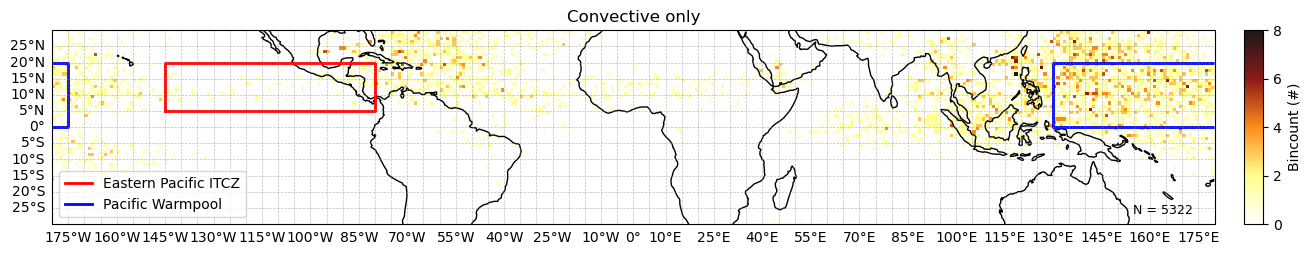

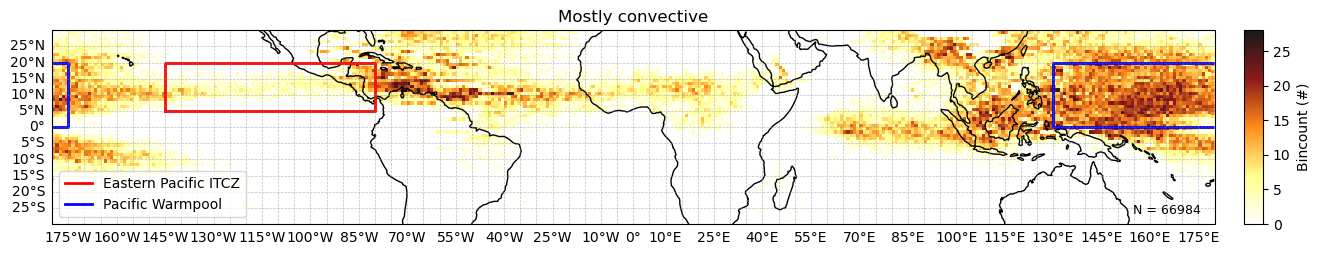

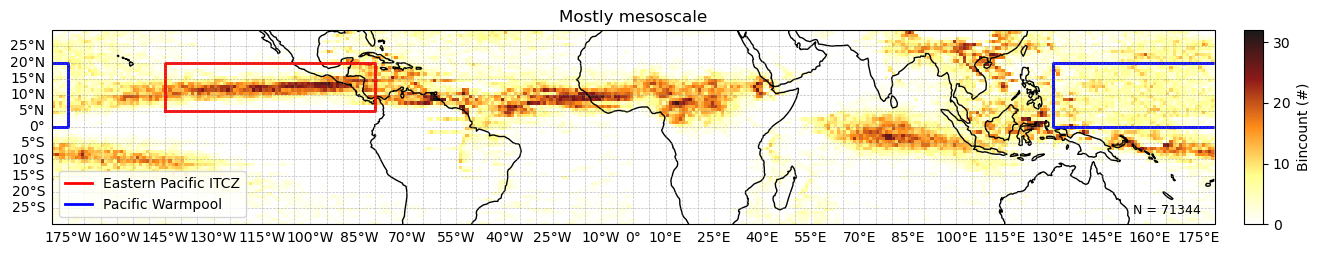

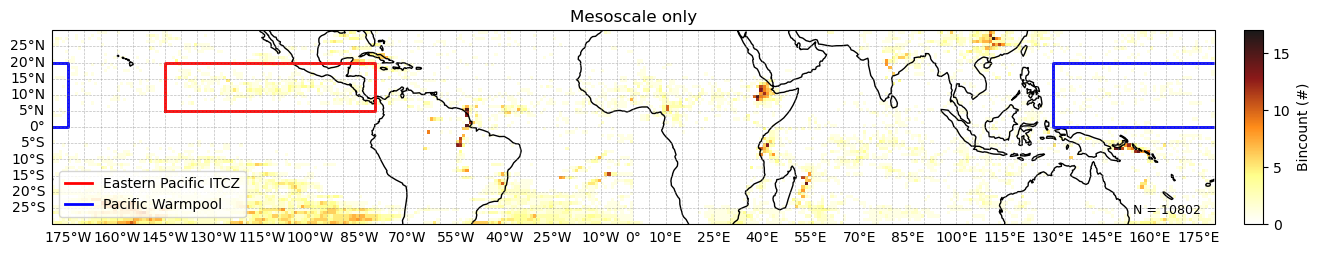

In [7]:
import cartopy.crs as ccrs
%matplotlib inline
# Show frequency maps of extremes in the 4 regions (normalized by total bincount in mask?)
jd.make_mask()

mask_all = jd.mask_branch1_90, jd.mask_coloc_c_90, jd.mask_coloc_ac_90, jd.mask_branch2_90
mask_names = 'Convective only','Mostly convective','Mostly mesoscale','Mesoscale only'
mask_labels = 'conv','mostlyconv','mostlyacc','acc'

for mask,mask_name,mask_label in zip(mask_all,mask_names,mask_labels):
    
    print(mask_name)
    mask_yxt = jd.get_mask_yxt_from_mask_jdist(mask)
    ax = jd.make_map(mask_yxt)
    lon_min, lon_max = 215, 280 #gr.lon_slice.start , gr.lon_slice.stop
    lat_min, lat_max = 5, 20#gr.lat_slice.start, gr.lat_slice.stop
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
                [lat_min, lat_min, lat_max, lat_max, lat_min],
                color='red', linestyle='-', linewidth=2, transform=ccrs.PlateCarree(), label = "Eastern Pacific ITCZ")
    lon_min, lon_max = 130, 185 #gr.lon_slice.start , gr.lon_slice.stop
    lat_min, lat_max = 0, 20#gr.lat_slice.start, gr.lat_slice.stop
    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
                [lat_min, lat_min, lat_max, lat_max, lat_min],
                color='blue', linestyle='-', linewidth=2, transform=ccrs.PlateCarree(), label = "Pacific Warmpool")
    ax.legend()
    
    ax.set_title(mask_name)

    # plt.savefig(os.path.join(figdir,'map_bincount_%s_extremes.pdf'%(mask_label)),bbox_inches='tight')
    # plt.savefig(os.path.join(figdir,'map_bincount_%s_extremes.png'%(mask_label)),bbox_inches='tight')

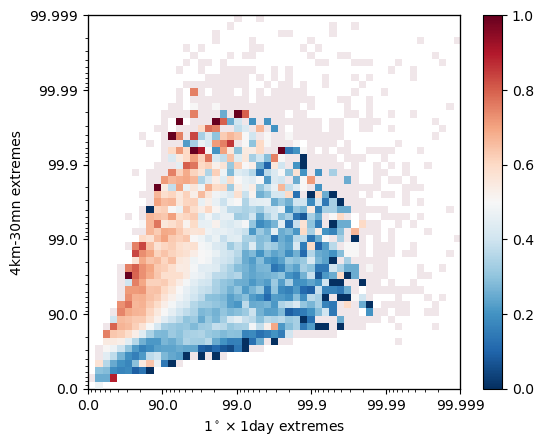

In [11]:
data, noise = jd.get_mcs_bin_fraction()
jd.plot_data(data, noise, branch=False)